<a href="https://colab.research.google.com/github/Elfeny7/PCVK_Sem5/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Ikmal Faris Musyaffa**
2141720123 / 12 / TI-3B

Praktikum 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

Mounted at /content/drive


In [ ]:
gambar = cv.imread('/content/drive/MyDrive/PCVK/Images/modul5/female.png')

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma (misalnya 1.5): 0.5


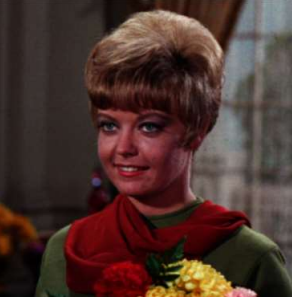

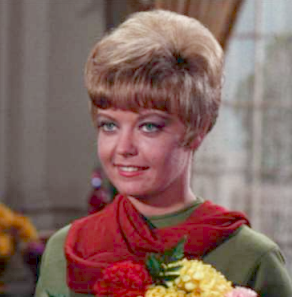

In [5]:
# Load gambar dari path yang sesuai
gambar = cv.imread('/content/drive/MyDrive/PCVK/Images/modul5/female.png')

print(' Gamma Correction pada citra ')
print('----------------------------------')

try:
    gamma = float(input('Masukkan nilai Gamma (misalnya 1.5): '))
except ValueError:
    print('Error, not a number')
    gamma = 1.0  # Set gamma ke nilai default jika ada kesalahan input

# Melakukan gamma correction
gamma_corrected = np.array(255 * (gambar / 255) ** gamma, dtype = 'uint8')

# Menampilkan gambar asli dan hasil gamma correction
cv2_imshow(gambar)
cv2_imshow(gamma_corrected)

cv.waitKey(0)
cv.destroyAllWindows()


Praktikum 2

 Bit Depth pada Citra
---------------------------------


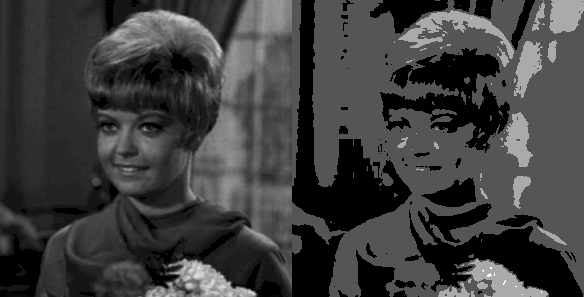

In [83]:
print(' Bit Depth pada Citra')
print('---------------------------------')

bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/Images/modul5/female.png', cv.IMREAD_GRAYSCALE)

bit_depth_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
       bit_depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255)

final_frame = cv.hconcat((original, bit_depth_image))
cv2_imshow(final_frame)

Praktikum3

Masukkan nilai 5,30,60,80,100: 100


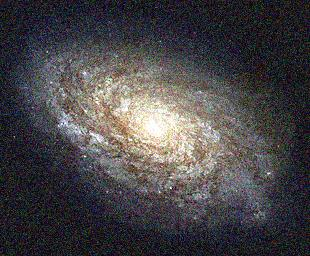

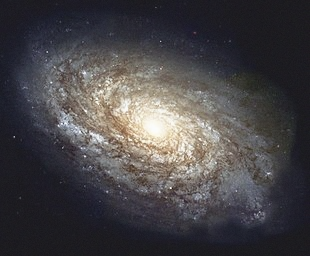

PSNR antara gambar asli dan hasil average denoising: 28.90 dB


In [79]:
import glob

def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value


try:
    avg = float(input('Masukkan nilai 5,30,60,80,100: '))
except ValueError:
    print('Error, not a number')
    avg = 100  # Set gamma ke nilai default jika ada kesalahan input

# Jumlah gambar yang ingin dimuat
desired_num_images = avg

# Buat list untuk menyimpan semua gambar
cv_img = []

# Membaca gambar dari direktori
for i, img_path in enumerate(glob.glob('/content/drive/MyDrive/PCVK/Images/modul5/noises/*.jpg')):
    n = cv.imread(img_path)
    if n is not None:  # Periksa apakah gambar berhasil dibaca
        cv_img.append(n)

    # Hentikan proses setelah mencapai jumlah gambar yang diinginkan
    if len(cv_img) >= desired_num_images:
        break

# Periksa berapa jumlah gambar yang berhasil dibaca
num_images = len(cv_img)

if num_images == 0:
    print("Tidak ada gambar yang berhasil dibaca.")
else:
    # Menghitung rata-rata dari gambar yang berhasil dibaca
    average_image = np.mean(cv_img, axis=0).astype(np.uint8)

    # Menampilkan salah satu gambar asli dan gambar hasil average denoising
    cv2_imshow(cv_img[0])  # Menampilkan salah satu gambar asli
    cv2_imshow(average_image)

    # Menghitung PSNR antara gambar asli dan gambar hasil average denoising
    psnr_value = psnr(cv_img[0], average_image)
    print(f"PSNR antara gambar asli dan hasil average denoising: {psnr_value:.2f} dB")

    cv.waitKey(0)
    cv.destroyAllWindows()


Praktikum4

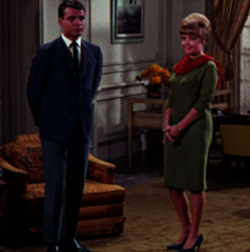

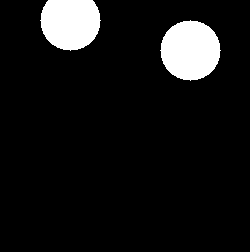

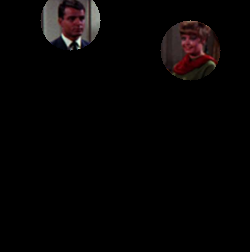

In [84]:


# Read an input image
img = cv.imread('/content/drive/MyDrive/PCVK/Images/modul5/couple.png')

# Create two black masks with the same dimensions as the input image
mask1 = np.zeros(img.shape[:2], dtype=np.uint8)
mask2 = np.zeros(img.shape[:2], dtype=np.uint8)

# Define the center and radius of the first circular mask
center1 = (70, 20)  # Koordinat pusat bundar pertama
radius1 = 30  # Radius bundar pertama

# Define the center and radius of the second circular mask
center2 = (190, 50)  # Koordinat pusat bundar kedua
radius2 = 30  # Radius bundar kedua

# Draw filled white circles on the masks
cv.circle(mask1, center1, radius1, (255, 255, 255), thickness=-1)
cv.circle(mask2, center2, radius2, (255, 255, 255), thickness=-1)

# Perform bitwise OR operation to combine the masks
combined_mask = cv.bitwise_or(mask1, mask2)

# Perform bitwise AND operation to mask the image
masked_img = cv.bitwise_and(img, img, mask=combined_mask)

# Display the original image, masks, and the masked image
cv2_imshow(img)

cv2_imshow(combined_mask)
cv2_imshow(masked_img)

cv.waitKey(0)
cv.destroyAllWindows()


Praktikum 5

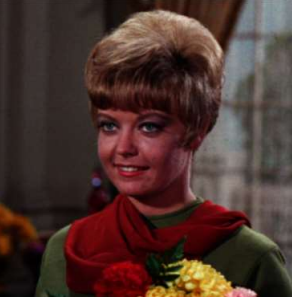

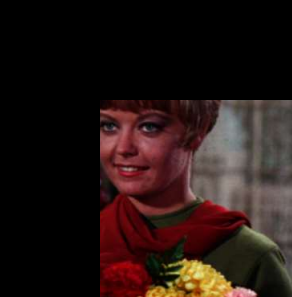

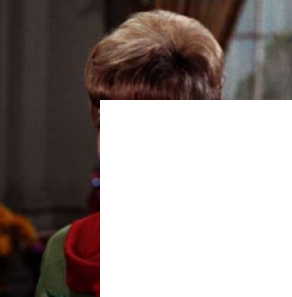

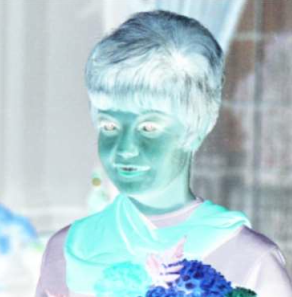

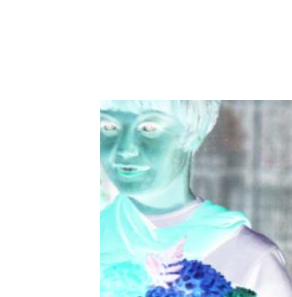

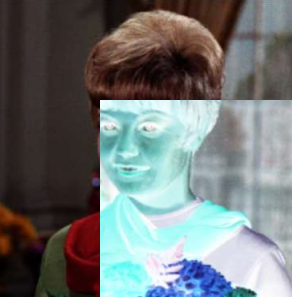

In [85]:

# Baca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/Images/modul5/female.png')  # Konversi gambar menjadi grayscale

# Buat maska dengan format yang sama seperti gambar
mask = np.zeros_like(img)

# Tentukan area yang ingin dimask (misalnya, kotak)
x1, y1, x2, y2 = 100, 100, 300, 300

# Isi area kotak pada maska dengan nilai 255 (putih)
mask[y1:y2, x1:x2] = 255

and_result = cv.bitwise_and(img, mask)

# Lakukan operasi bitwise OR antara gambar dan maska
or_result = cv.bitwise_or(img, mask)

# Lakukan operasi bitwise NOT pada gambar
not_result = cv.bitwise_not(img)

# Lakukan operasi bitwise NAND antara gambar dan maska
nand_result = cv.bitwise_not(cv.bitwise_and(img, mask))

# Lakukan operasi bitwise XOR antara gambar dan maska
xor_result = cv.bitwise_xor(img, mask)

# Tampilkan gambar asli dan hasil operasi logika
cv2_imshow(img)
cv2_imshow(and_result)
cv2_imshow(or_result)
cv2_imshow(not_result)
cv2_imshow(nand_result)
cv2_imshow(xor_result)

# Tunggu sampai pengguna menekan tombol apapun
cv.waitKey(0)
cv.destroyAllWindows()


Hasil analisa :
1. and membuat gambar berwarna hitam namun masking berwarna normal
2. or membuat mask yang berwarna putih dan gambar asli tetap berwarna normal
3. not hanya akan membuat warna gambar menjadi negatif
4. nand membuat gambar asli berwarna putih dan area masking berwarna negatif
5. xor membuat gambar berwarna normal dan area masking berwarna negatif